<a href="https://colab.research.google.com/github/HMBinara/Try_Ml/blob/main/K_MeanImplementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files

In [ ]:
uploaded = files.upload()
data = pd.read_csv('Mall_Customers.csv')
data.head()

Saving Mall_Customers.csv to Mall_Customers (2).csv


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data =data[['Annual Income (k$)','Spending Score (1-100)']]
data.sample(5)

,Annual Income (k$),Spending Score (1-100)
63,47,59
26,28,32
78,54,52
156,78,1
196,126,28


In [ ]:
data = data.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)': 'score'})
data.sample(5)


,Income,score
138,74,10
59,46,46
179,93,90
64,48,51
9,19,72


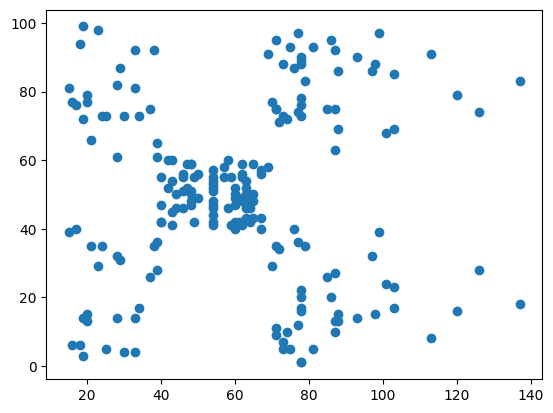

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data['Income'],data['score'])


In [ ]:
from sklearn.cluster import KMeans
k_values = [1,2,3,4,5,6,7,8,9,10]
wcss_error = []
for k in k_values:
  model = KMeans(n_clusters=k)
  model.fit(data[['Income','score']])
  wcss_error.append(model.inertia_)


In [ ]:
wcss_error

[269981.28000000014,
 184609.98434090626,
 106348.37306211119,
 97044.66783625723,
 44454.47647967972,
 37265.86520484345,
 32233.422550637762,
 28405.406633906725,
 22790.508335774495,
 20724.430585697817]

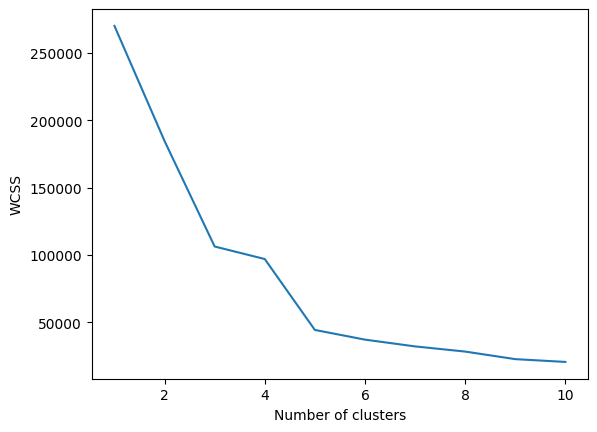

In [ ]:
plt.plot(k_values,wcss_error)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
pred = model.fit_predict(data)

In [ ]:
pred

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1,
       3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [ ]:
data.head(5)

,Income,score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
data['cluster'] = pred
data.head(5)

,Income,score,cluster
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3


In [ ]:
c1 = data[data['cluster'] ==0]
c2 = data[data['cluster'] ==1]
c3 = data[data['cluster'] ==2]
c4 = data[data['cluster'] ==3]
c5 = data[data['cluster'] ==4]


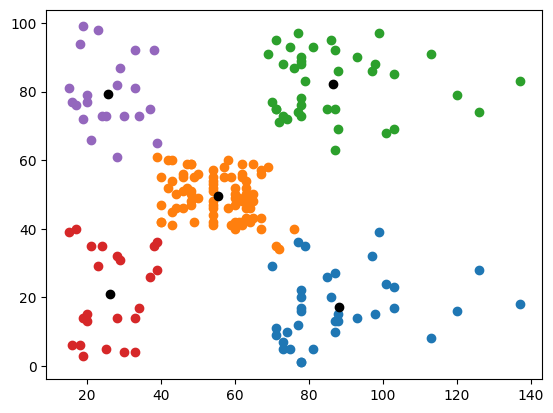

In [ ]:
plt.scatter(c1['Income'],c1['score'])
plt.scatter(c2['Income'],c2['score'])
plt.scatter(c3['Income'],c3['score'])
plt.scatter(c4['Income'],c4['score'])
plt.scatter(c5['Income'],c5['score'])
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], color = 'black')

In [ ]:
model.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])